This notebook generates plots of summary data from many runs of the simulator.

eg average R0, epidemic size, cluster sizes, and geographical spread in terms of districts.

NB Could be optimised quite a lot - if the input files are large there's a lot of unnecessary loops going on if you want to run everything

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

plt.rcParams.update({'font.size':20})

dropbox_path = "/Users/s1743989/VirusEvolution Dropbox/Verity Hill/Agent_based_model/Looping models/Results/"
results_path = "Fitted_runs/no_caps/2/"

In [25]:
#Prints useful things

def summary_sizes(infile):
    
    epi_size = []

    with open(infile) as f:
        next(f)
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[1]))

            
    size_freq = Counter(epi_size)
    
    sum_of_numbers = sum(number*count for number, count in size_freq.items())
    count = sum(count for n, count in size_freq.items())
    mean = sum_of_numbers / count
    
    print("Average epidemic size = " + str(mean))
    
    print("Range = " + str(min(epi_size)) + " to " + str(max(epi_size)))
    
    print("Percentage that didn't spread at all = " + str((size_freq[1]/count)*100) + " (" + str(size_freq[1]) + ")" )
    



In [38]:
#Plots the frequency of different epidemic sizes

def plt_size(infile):

    size_list = []
    size_freqs = Counter()
    plt.rcParams.update({'font.size': 25})


    with open(infile) as f:
        next(f)
        for l in f:
            size = l.strip("\n").split(",")[1]
            size_list.append(size)

    for i in size_list:
        size_freqs[int(i)] += 1

    x2 = []
    y2 = []

    for key, value in sorted(size_freqs.items()):
        x2.append(key)
        y2.append(value)

    #print(x2)
    #print(x,y)

    #plt.bar(x3,y3)


    n, bins, patches = plt.hist(x = x2, bins = 'auto',
                               color='#0504aa',
                                alpha=0.7, rwidth=0.85)

    #     plt.show()

    plt.xticks(rotation=45)
    plt.title("Epidemic sizes")
    plt.xlabel("Number of cases in epidemic")
    plt.ylabel("Frequency")

    
    #plt.savefig(path+results+"from_server/sizes.pdf", bbox_inches="tight")

    plt.show()

In [37]:
#Plots how long epidemics lasted for

def plt_persistence(input_file):
    
    len_list = []
    len_freqs = {}
    
    with open(input_file) as f:
        next(f)
        for l in f:
            length = l.strip("\n").split(",")[1]
            len_list.append(int(length))
            
    #print(len_list)
    
    for i in range(max(len_list) + 1):
        len_freqs[i] = 0

    for i in len_list:
        len_freqs[i] += 1

    
    x = []
    y = []

    for key, value in len_freqs.items():
        x.append(key)
        y.append(value)
        
        
    plt.bar(x,y)


#     #n, bins, patches = plt.hist(x = x, bins = 'auto',
#                                color='#0504aa',
#                                 alpha=0.7, rwidth=0.85)
    

    plt.title("Epidemic persistence")
    plt.xlabel("Length of Epidemic (days)")
    plt.ylabel("Frequency")
    plt.show()

In [18]:
def plt_R0(infile):
    
    R0 = []

    with open(infile) as f:
        next(f)
        for l in f:
            toks = l.strip("\n").split(",")
    #         print(type(toks[0]))
            R0.append(round(float(toks[1]), 2))

    print("Largest R0 = " + str(max(R0)))

    R0_freq = Counter(R0)

    x = list(R0_freq.keys())

    y = list(R0_freq.values())

    n, bins, patches = plt.hist(x = x, bins = 'auto',
                               color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    
    plt.title("Average R0")
    plt.xlabel("R0")
    plt.ylabel("Frequency")
    #plt.bar(x, y, width = 0.01)
    #May need to go back to bar
    
    #plt.savefig("Results/More_test_runs/1/R0.pdf", bbox_inches="tight")
    
    plt.show()  

In [19]:
#Plots the frequency of different numbers of districts involved

def plt_district_number(infile):
    
    district_number = []
    epi_size = []

    with open(infile) as f:
        next(f)
        for l in f:
            toks = l.strip("\n").split(",")
            #epi_size.append(int(toks[0]))
            district_number.append(int(toks[2]))


    #size_freq = Counter(epi_size)
    dist_freq = Counter(district_number)
    
    print("range in number of districts = " 
          + str(min(district_number)) + " to " + str(max(district_number)))
    
    x = list(dist_freq.keys())
    y = list(dist_freq.values())


    plt.title("Number of districts involved")
    plt.xlabel("Number of districts")
    plt.ylabel("Frequency")
    plt.bar(x, y)
    

    #plt.savefig("Results/More_test_runs/1/district_number.pdf", bbox_inches="tight")
    
    plt.show()   

In [27]:
#Plots how often each district appears in an epidemic
#As its input, takes the directory where log files are stored. Can choose to only use large epidemics.

def plt_spread(direc_big):

    district_list = ["bo", 'bombali', 'bonthe', 'kailahun', 'kambia', 'kenema', 'koinadugu', 'kono', 'moyamba', 'portloko', 'pujehun', 'tonkolili', 'westernarearural', 'westernareaurban']

    dist_count = {}

    for dist in district_list:
        dist_count[dist] = 0

    file_count = 0

#     for directory1 in os.listdir(direc_big):
#         print(directory1)
#         if directory1 != ".DS_Store":
    for log_file in os.listdir(direc_big): #+ directory1):
        if log_file != "large_epidemics.csv" and log_file != ".DS_Store":
            #print(log_file)
            dist_set = set()
            file_count += 1
            with open(direc_big + "/" + log_file) as f:
                next(f)
                for l in f:
                    toks = l.strip("\n").split(",")
                    #print(toks)
                    district = toks[4]

                    dist_set.add(district)

            for dist in district_list:
                if dist in dist_set:
                    #print(dist)
                    #print(dist_count[dist])
                    dist_count[dist] += 1  
                    #print(dist_count[dist])

            #print(dist_count)

    dist_percentage = {}

    for key, count in dist_count.items():
        dist_percentage[key] = (count/file_count)*100


    x = [i for i in range(14)]
    my_xticks = district_list
    
    plt.xticks(x,my_xticks, rotation=90)
    
    y = list(dist_percentage.values())

    plt.title("Percentage of times district was involved in epidemic")
    
    plt.bar(x,y)
    
    #plt.savefig(path + results + "from_server/spread_across_districts.pdf", bbox_inches="tight")
    
    plt.show()

In [30]:
#Plots number of districts involved against the epidemic size

def plt_dist_size(infile):
    
    district_number = []
    epi_size = []

    with open(infile) as f:
        next(f)
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[1]))
            district_number.append(int(toks[2]))
            
    x = district_number
    y = epi_size
    
    
    plt.title("Districts against epidemic size")
    plt.xlabel("Number of districts with cases")
    plt.ylabel("Epidemic size")
    plt.scatter(x,y)
    
    
    #plt.savefig("Results/More_test_runs/1/district_against_size.pdf",bbox_inches="tight")
    
    plt.show()

In [28]:
#Plots the number of clusters  involved against epidemic size

def plt_cluster_size(infile):
    

    small_epis = []
    epi_size = []
    cluster_number = []
    
    tup_list = []
    small_epis = []

    with open(infile) as f:
        next(f)
        for l in f:
            toks = l.strip("\n").split(",")
            epi_size.append(int(toks[1]))
            cluster_number.append(int(toks[3]))
            tup_list.append((int(toks[1]), int(toks[3])))
            
    x = cluster_number
    y = epi_size
    
    
#     for item in tup_list:
#         if item[0] < 5000:
#             small_epis.append((item[0], item[1]))
            
#     x = [item[0] for item in small_epis]
#     y = [item[1] for item in small_epis]
    
    
    plt.title("Household clusters against epidemic size")
    plt.xlabel("Number of household clusters with cases")
    plt.ylabel("Epidemic size")
    plt.scatter(x,y)
    plt.scatter(x,y)
    
    #plt.savefig("Results/More_test_runs/1/cluster_against_size_smalls.pdf", bbox_inches="tight")
    
    plt.show()

In [23]:
#Plots all of the above functions

def plot_summary(size_file, R0_file, persistence_file, directory):
    
    plt.rcParams.update({'font.size': 25})
    
    summary_sizes(size_file)
    plt_size(size_file)
    plt_persistence(persistence_file)
    
    plt_dist_size(size_file)
    plt_district_number(size_file)
    plt_spread(directory)
    
    plt_cluster_size(size_file)
    
    plt_R0(R0_file)

Average epidemic size = 1426318.19
Range = 19 to 1883028
Percentage that didn't spread at all = 0.0 (0)


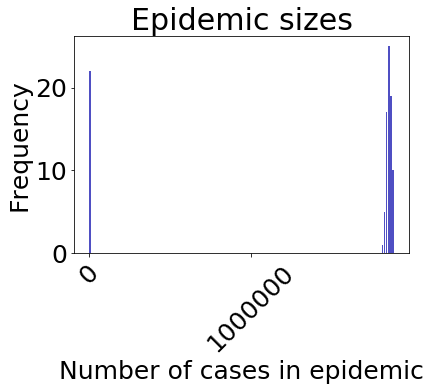

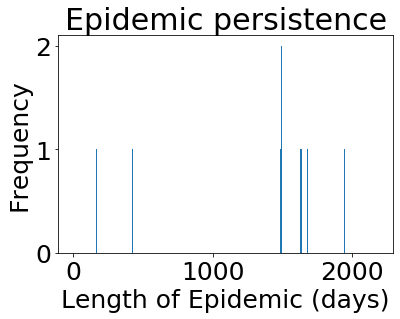

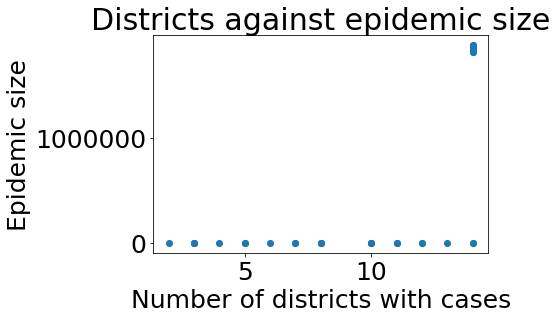

range in number of districts = 2 to 14


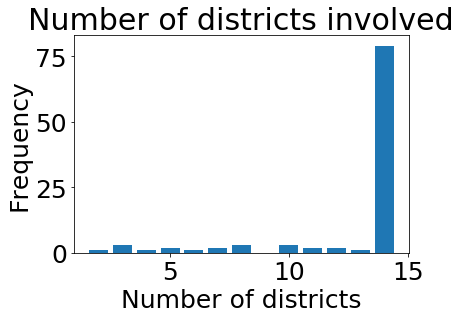

KeyboardInterrupt: 

In [39]:
plot_summary(dropbox_path + results_path + "epidemic_size.csv",dropbox_path + results_path + "R0_run.csv", dropbox_path + results_path + "persistence.csv", dropbox_path + results_path + "log_files/")

            